<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>Data Science</center>
# <center>2 - Tabular Data</center>
---

# 1. Load and preprocess data

## 1.1 Load data

In [4]:
import pandas as pd
telcoData = pd.read_csv('./Telco-Churn.csv', index_col='customerID', na_values=' ')
telcoData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telcoData.shape()

TypeError: 'tuple' object is not callable

## 1.2 Check missing data

## 1.3 Fix missing data by filling with 0

## 1.4 Validate with there are no missing data

In [2]:
telcoData.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

# Univariate analysis : Categorical

# 2. Frequency table

## 2.1 Count

In [3]:
pd.crosstab(telcoData['Churn'], columns='Count')

col_0,Count
Churn,
No,5174
Yes,1869


## 2.2 Normalized frequency table

In [4]:
# normalize by column ค่าร้อยละในคอลัมน์เดียวกันเอาแต่ละแถวมารวมกันได้ 1
pd.crosstab(telcoData['Churn'], columns='Count', normalize='columns')

col_0,Count
Churn,
No,0.73463
Yes,0.26537


# 3. Barplot

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

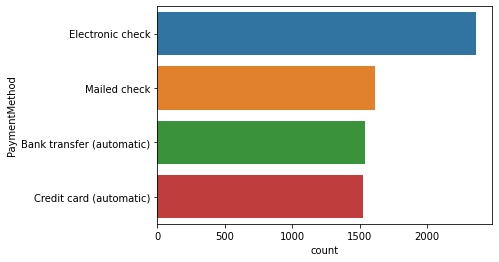

In [5]:
import seaborn as sns

# นับความถี่แยกตาม category ที่กำหนด
sns.countplot(data = telcoData, y = 'PaymentMethod')

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

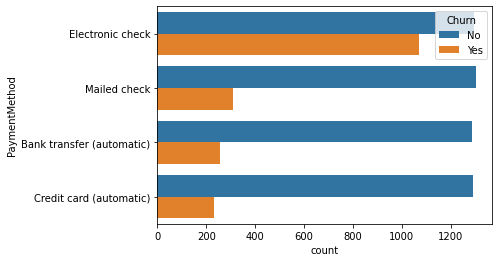

In [6]:
# countplot with multiple x variables
# นับแยกความถี่ตาม category 
sns.countplot(data = telcoData, y = 'PaymentMethod', hue = 'Churn')

# Univariate analysis : Numeric

# 4. Descriptive statisitcs

In [7]:
# mean, median, varaince, standard deviation, quartiles
telcoData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 5. Histogram

## 5.1 with Pandas

Text(0, 0.5, 'Frequency')

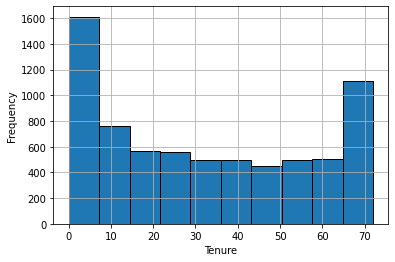

In [8]:
# distribution of numerical data
import matplotlib.pyplot as plt
telcoData['tenure'].hist(edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

## 5.2 with seaborn

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure'>

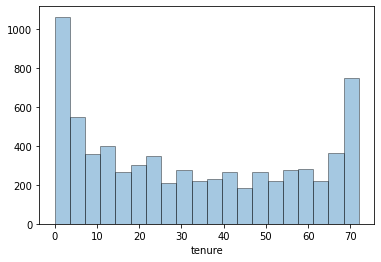

In [9]:
# be careful choosing suitable bins for data
sns.distplot(telcoData['tenure'], 
             bins=20, 
             kde=False, 
             hist_kws={'edgecolor':'black'})

# Multivariate analysis : Categorical vs Categorical

# 6. Crosstab

## 6.1 Crosstab

In [10]:
# ใส่ตัวแปรนึงเป็น index อีกตัวแปรเป็น column 
pd.crosstab( index = telcoData['Contract'],
             columns = telcoData['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


## 6.2 Normalized crosstab

In [11]:
# normalize=True -> ร้อยละของแต่ละ combination 
# 100% = เอาค่าทุกแถวทุกคอลัมน์มาบวกกัน
pd.crosstab( index = telcoData['Contract'],
             columns = telcoData['Churn'],
             normalize=True)

Churn,No,Yes
Contract,,
Month-to-month,0.315207,0.234985
One year,0.185574,0.023570
Two year,0.233849,0.006815


## 6.3 Pivot table

In [12]:
# normalize by row
import numpy as np
pd.pivot_table(data = telcoData,
               index = ['Contract','PaymentMethod'],
               columns = 'Churn',
               values = 'TotalCharges',
               aggfunc= np.size)\
  .apply(lambda x: x/sum(x), axis = 1)

Churn                                           No       Yes
Contract       PaymentMethod                                
Month-to-month Bank transfer (automatic)  0.658744  0.341256
               Credit card (automatic)    0.672192  0.327808
               Electronic check           0.462703  0.537297
               Mailed check               0.684211  0.315789
One year       Bank transfer (automatic)  0.902813  0.097187
               Credit card (automatic)    0.896985  0.103015
               Electronic check           0.815562  0.184438
               Mailed check               0.931751  0.068249
Two year       Bank transfer (automatic)  0.966312  0.033688
               Credit card (automatic)    0.977625  0.022375
               Electronic check           0.922619  0.077381
               Mailed check               0.992147  0.007853

# Multivariate analysis : Categorical vs Numerical

# 7. Stacked bar chart

In [13]:
# qcut เปลี่ยนตัวเลขเป็น categorical โดยแบ่งเป็นช่วงตาม quantiles
telcoData['tenure_bin'] = pd.qcut(telcoData['tenure'], q = 5)

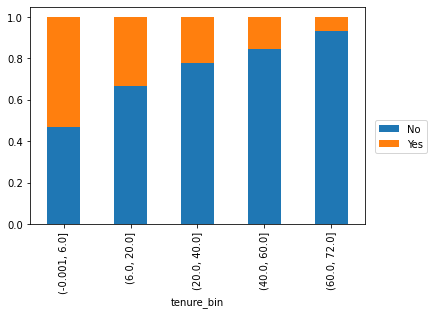

In [14]:
# norminal vs numeric
# proportion
churnByTenure = pd.crosstab(index = telcoData['tenure_bin'],
                            columns = telcoData['Churn'])\
                  .apply(lambda x: x/sum(x), axis = 1)
churnByTenure.plot.bar(stacked = True).legend(bbox_to_anchor=(1.2, 0.5))

# 8. Boxplot

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

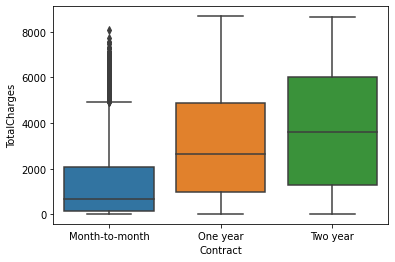

In [15]:
# category vs numerical
sns.boxplot(data = telcoData, x = 'Contract', y = 'TotalCharges')

# 9. Scatter plot

## 9.1 Non-aggregated scatter plot

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

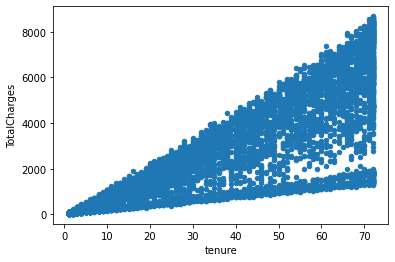

In [16]:
# numerical vs numerical
# graphical
# ดูทุกๆจุดของข้อมูล เพื่อดูภาพรวม แนวโน้มข้อมูล
telcoData.plot.scatter(x = 'tenure', y = 'TotalCharges')

## 9.2 Aggregated scatter plot

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

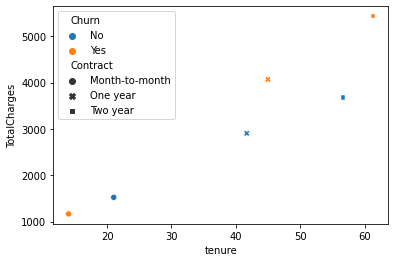

In [17]:
# numerical vs numerical
# graphical
# ordered pairs
telcoData1 = telcoData.groupby(['Contract','Churn'], as_index=False)\
                      .agg({'tenure':'mean', 'TotalCharges':'mean'})
sns.scatterplot(data = telcoData1, 
                x = 'tenure', 
                y = 'TotalCharges', 
                hue = 'Churn', 
                style = 'Contract')

# 10. Correlation

In [18]:
# numerical vs numerical
# non-graphical
telcoData.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


# 11. Heatmap

<AxesSubplot:>

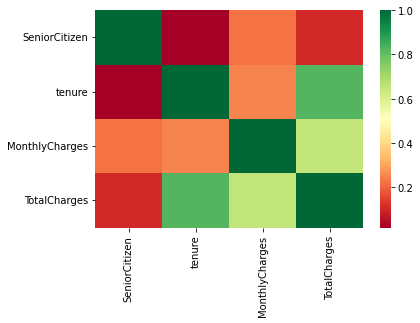

In [19]:
# plott correlation into heatmap
sns.heatmap(telcoData.corr(), cmap = 'RdYlGn')

## Tabular data lab

### 1. Select a data source : Avocado Prices

https://www.kaggle.com/neuromusic/avocado-prices

In [20]:
avocado = pd.read_csv('./avocado.csv')
avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### 2. Identify what form of data it has : Time series table

### 3. Select one aspect/question of the data, create a visualization to describe the data

#### Q : What region is the highest avocado production?
#### A : Louisville

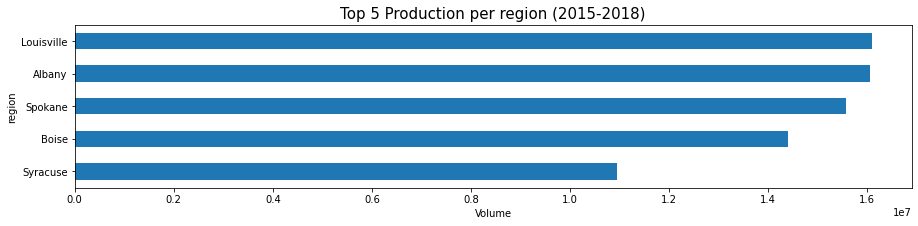

In [21]:
avo_sum = avocado.groupby('region')['Total Volume'].sum()
plt.figure(figsize=(15,3))
avo_sum.sort_values().head(5).plot.barh()
plt.title('Top 5 Production per region (2015-2018)', fontsize=15)
plt.xlabel('Volume')
plt.show()

In [7]:
A = [1,2,3]
[a+5 for a in A]

[6, 7, 8]

In [11]:
[a for a in A +5]

TypeError: can only concatenate list (not "int") to list

In [13]:
def add(x) :
    return (x+1)
y=0
x=y+5
add(x)

6